# Academic Summary of “A Tutorial on Hidden Markov Models and Selected Applications in Speech Recognition” (Rabiner, 1989)

# https://www.cs.cmu.edu/~cga/behavior/rabiner1.pdf


## Abstract  
This landmark tutorial introduced **Hidden Markov Models (HMMs)** as a rigorous statistical framework for modeling sequential data. It unified theory, algorithms, and applications in speech recognition, establishing HMMs as the dominant paradigm for decades.

---

## Key Problems / Research Gaps
| Problem | Limitation in Prior Work | Rabiner’s Contribution |
|---------|--------------------------|-------------------------|
| Modeling sequential data | Early speech recognition systems lacked a principled statistical treatment of temporal variability | Introduced HMMs with **states, transitions, and emissions** to capture sequence dynamics |
| Parameter estimation | No efficient way to estimate probabilities from incomplete or noisy acoustic data | Formalized **Baum–Welch algorithm (EM)** for robust parameter learning |
| Recognition and decoding | Heuristic mapping of signals to words/phonemes limited scalability and accuracy | Introduced **Viterbi algorithm** for optimal decoding |
| Sequence probability evaluation | No unified way to compute the likelihood of an observation sequence | Developed **Forward–Backward algorithm** for efficient probability evaluation |

---

## Methodology
- **Formal Definition**:  
  - Discrete and continuous HMMs, defined by transition probabilities, emission distributions, and initial state probabilities.  
- **Algorithms**:  
  - **Forward–Backward** for likelihood evaluation.  
  - **Viterbi** for optimal hidden state decoding.  
  - **Baum–Welch (EM)** for parameter estimation.  
- **Applications**: Isolated-word and continuous speech recognition tasks, with scalable training and inference.

---

## Results
- HMMs outperformed heuristic methods in **robustness** and **scalability**.  
- Successfully applied to **large-vocabulary speech recognition**, demonstrating practical viability.  
- Became the **standard acoustic modeling framework** in ASR for the following two decades.

---

## Conclusions
- Rabiner’s 1989 tutorial established **HMMs as the mathematical foundation of speech recognition**.  
- By framing speech as a **stochastic process** governed by hidden states and probabilistic transitions, the tutorial unified theory and practice.  
- The framework directly inspired later innovations, including **hybrid DNN-HMM systems** and **end-to-end deep learning models**.  

**Historical Significance**: This tutorial is one of the most cited works in speech processing and remains the canonical reference for probabilistic sequence modeling.  


# Mathematical and Statistical Summary of “A Tutorial on Hidden Markov Models and Selected Applications in Speech Recognition” (Rabiner, 1989)

## 1. Definition of a Hidden Markov Model (HMM)

An HMM is specified by three sets of probabilities:

- **State Transition Probabilities**  
$$
a_{ij} = P(q_{t+1} = j \mid q_t = i), \quad 1 \leq i,j \leq N
$$  
Forms the transition matrix \(A\).

- **Observation (Emission) Probabilities**  
Discrete case:  
$$
b_j(k) = P(o_t = v_k \mid q_t = j)
$$  

Continuous (mixture of Gaussians):  
$$
b_j(o_t) = \sum_{m=1}^M c_{jm} \, \mathcal{N}(o_t; \mu_{jm}, \Sigma_{jm})
$$  

- **Initial State Probabilities**  
$$
\pi_i = P(q_1 = i)
$$  

An HMM is thus parameterized by:  
$$
\lambda = (A, B, \pi)
$$  

---

## 2. The Three Central HMM Problems

### (a) Evaluation (Likelihood of a Sequence)

Given an observation sequence \(O = o_1, o_2, \dots, o_T\), compute \(P(O \mid \lambda)\).

- **Forward variable**:  
$$
\alpha_t(i) = P(o_1, o_2, \dots, o_t, q_t = i \mid \lambda)
$$  

- **Recursion**:  
$$
\alpha_{t+1}(j) = \left( \sum_{i=1}^N \alpha_t(i) a_{ij} \right) b_j(o_{t+1})
$$  

- **Final probability**:  
$$
P(O \mid \lambda) = \sum_{i=1}^N \alpha_T(i)
$$  

---

### (b) Decoding (Most Likely State Sequence)

Find the optimal state path \(Q = q_1, q_2, \dots, q_T\).

- **Viterbi variable**:  
$$
\delta_t(j) = \max_{q_1, \dots, q_{t-1}} P(q_1, \dots, q_{t-1}, q_t=j, o_1, \dots, o_t \mid \lambda)
$$  

- **Recursion**:  
$$
\delta_t(j) = \max_i \big[ \delta_{t-1}(i) a_{ij} \big] \, b_j(o_t)
$$  

Backtracking recovers the best state sequence.

---

### (c) Learning (Parameter Estimation)

Adjust \(\lambda = (A,B,\pi)\) to maximize \(P(O \mid \lambda)\).  
Solved by **Baum–Welch Algorithm** (an EM method).

- **Backward variable**:  
$$
\beta_t(i) = P(o_{t+1}, \dots, o_T \mid q_t = i, \lambda)
$$  

- **Expected state occupancy**:  
$$
\gamma_t(i) = \frac{\alpha_t(i)\beta_t(i)}{P(O \mid \lambda)}
$$  

- **Expected transitions**:  
$$
\xi_t(i,j) = \frac{\alpha_t(i) a_{ij} b_j(o_{t+1}) \beta_{t+1}(j)}{P(O \mid \lambda)}
$$  

- **Re-estimation formulas**:  
$$
\pi_i = \gamma_1(i)
$$  

$$
a_{ij} = \frac{\sum_{t=1}^{T-1} \xi_t(i,j)}{\sum_{t=1}^{T-1} \gamma_t(i)}
$$  

$$
b_j(k) = \frac{\sum_{t:o_t=v_k} \gamma_t(j)}{\sum_{t=1}^T \gamma_t(j)}
$$  

Iterating these updates monotonically increases the likelihood.

---

## 3. Statistical Methods and Metrics

- **Likelihood**: Central measure of model fit.  
- **Maximum Likelihood Estimation (MLE)**: Baum–Welch for parameter optimization.  
- **Dynamic Programming**: Enables efficient Forward, Backward, and Viterbi computations.  
- **Error Rates (WER/PER)**: Later adopted in ASR to evaluate recognition accuracy.

---

## 4. Role in the Paper

- Provided the **rigorous mathematical framework** for HMMs in sequential data modeling.  
- Introduced **three fundamental algorithms**:  
  - Forward (likelihood)  
  - Viterbi (decoding)  
  - Baum–Welch (learning)  
- Unified statistical modeling, training, and decoding for speech recognition.

---

##  Summary

Rabiner (1989) mathematically formalized HMMs as a **probabilistic backbone for speech recognition**, solving evaluation, decoding, and learning with elegant dynamic programming methods. These formulations established HMMs as the dominant paradigm in ASR for decades and influenced subsequent hybrid and deep learning systems.


# Hidden Markov Model (HMM) Framework (Rabiner, 1989)
```

                ┌─────────────────────────────┐
                │   Hidden Markov Model λ     │
                │   Parameters: (A, B, π)     │
                │   - A: State transitions    │
                │   - B: Emission probs       │
                │   - π: Initial distribution │
                └───────────────┬─────────────┘
                                │
                                ▼
           ==========================================================
           PROBLEM 1: EVALUATION (Likelihood of Observations)
           ==========================================================
                                │
                                ▼
                ┌─────────────────────────────┐
                │ Forward Algorithm            │
                │ - Compute P(O | λ)          │
                │ - Recurrence:               │
                │   α_t(j) = ( Σ_i α_{t-1}(i) │
                │              * a_ij )       │
                │              * b_j(o_t)     │
                └─────────────────────────────┘

           ==========================================================
           PROBLEM 2: DECODING (Most Likely State Sequence)
           ==========================================================
                                │
                                ▼
                ┌─────────────────────────────┐
                │ Viterbi Algorithm           │
                │ - Find optimal Q*           │
                │ - Recurrence:               │
                │   δ_t(j) = max_i [δ_{t-1}(i)│
                │              * a_ij]        │
                │              * b_j(o_t)     │
                │ - Backtracking recovers Q*  │
                └─────────────────────────────┘

           ==========================================================
           PROBLEM 3: LEARNING (Parameter Estimation)
           ==========================================================
                                │
                                ▼
                ┌─────────────────────────────┐
                │ Baum–Welch Algorithm (EM)   │
                │ - Maximize P(O | λ)         │
                │ - Expectation step:         │
                │   γ_t(i) = α_t(i)β_t(i)/P(O)│
                │   ξ_t(i,j) = ... (state     │
                │   transition expectation)   │
                │ - Maximization step:        │
                │   Update A, B, π using      │
                │   γ_t(i), ξ_t(i,j)          │
                │ - Iteratively increases     │
                │   likelihood                │
                └─────────────────────────────┘

           ==========================================================
           OUTPUT: Speech Recognition
           ==========================================================
                                │
                                ▼
                ┌─────────────────────────────┐
                │ Recognized sequence of words│
                │ or phonemes, based on HMM   │
                │ probabilities and decoding  │
                └─────────────────────────────┘
```

# Flow of Hidden Markov Model (HMM) in Speech Recognition

## 1. Model Definition
An HMM is specified by:
- **States**: Hidden phonetic or acoustic categories.  
- **Transition Probabilities**:  
  $$
  a_{ij} = P(q_{t+1} = j \mid q_t = i)
  $$
  Defines how the system moves between hidden states.  

- **Emission Probabilities**:  
  $$
  b_j(o_t) = P(o_t \mid q_t = j)
  $$
  Defines how each state generates observations (e.g., acoustic features).  

- **Initial State Probabilities**:  
  $$
  \pi_i = P(q_1 = i)
  $$

---

## 2. Evaluation (Forward Algorithm)
- Task: Compute likelihood of an observation sequence given the model.  
- Forward recursion:  
  $$
  \alpha_{t+1}(j) = \Big( \sum_{i=1}^N \alpha_t(i) a_{ij} \Big) b_j(o_{t+1})
  $$
- Final probability of observing $O = (o_1, \dots, o_T)$:  
  $$
  P(O \mid \lambda) = \sum_{i=1}^N \alpha_T(i)
  $$

---

## 3. Decoding (Viterbi Algorithm)
- Task: Find the **most likely hidden state sequence** $Q = (q_1, \dots, q_T)$.  
- Recursion:  
  $$
  \delta_t(j) = \max_i \big[ \delta_{t-1}(i) a_{ij} \big] b_j(o_t)
  $$
- Backtracking retrieves the best path (most likely state alignment).  

---

## 4. Learning (Baum–Welch Algorithm)
- Task: Estimate parameters $(A, B, \pi)$ to maximize $P(O \mid \lambda)$.  
- Uses **Expectation–Maximization (EM)**:
  - Forward variable $\alpha_t(i)$  
  - Backward variable $\beta_t(i)$  
  - State occupancy $\gamma_t(i)$  
  - Transition expectations $\xi_t(i,j)$  

- Re-estimation formulas:
  $$
  \pi_i = \gamma_1(i), \quad
  a_{ij} = \frac{\sum_{t=1}^{T-1} \xi_t(i,j)}{\sum_{t=1}^{T-1} \gamma_t(i)}, \quad
  b_j(k) = \frac{\sum_{t:o_t=v_k} \gamma_t(j)}{\sum_{t=1}^T \gamma_t(j)}
  $$

---

## 5. Application in Speech Recognition
- **Input**: Acoustic feature sequence (e.g., MFCCs, PLPs).  
- **Process**:  
  1. **Evaluation**: Measure how well the HMM explains the input.  
  2. **Decoding**: Find the best state/phoneme sequence with Viterbi.  
  3. **Learning**: Refine parameters with Baum–Welch on training data.  

- **Output**: The decoded **word or phoneme sequence** — the recognized speech.  

---

##  Flow Summary
1. **Model**: Define HMM (states, transitions, emissions).  
2. **Evaluation**: Compute likelihood of observed speech features.  
3. **Decoding**: Identify the most likely hidden state sequence.  
4. **Learning**: Iteratively improve model parameters.  
5. **Application**: Decode states into phonemes/words → speech recognition result.  


# Review Table – Rabiner (1989), *A Tutorial on Hidden Markov Models*

| Key Problem / Research Gap | Limitation of Prior Work | Proposed Solution in the Paper |
|-----------------------------|--------------------------|--------------------------------|
| Lack of a unified theoretical framework for modeling time-series with hidden state structure | Speech and pattern recognition relied on heuristic or ad hoc statistical models without rigorous probabilistic grounding | Introduced the Hidden Markov Model (HMM) as a complete stochastic framework, defining states, transitions, and emissions formally |
| Difficulty in evaluating sequence likelihoods efficiently | Naïve computation required summing over exponentially many possible hidden state paths | Presented the **Forward–Backward algorithm**, enabling efficient likelihood evaluation of observation sequences |
| No systematic method for decoding hidden state sequences | Prior methods lacked an optimal algorithm for inferring the most likely state sequence | Proposed the **Viterbi algorithm**, a dynamic programming solution for maximum-likelihood decoding |
| Underdeveloped parameter estimation for sequential models | Earlier models had no scalable training procedure, limiting application to real speech data | Introduced the **Baum–Welch algorithm** (an EM-based re-estimation method) for maximum likelihood training of HMM parameters |
| Limited interpretability of acoustic–phonetic mapping | Statistical models did not provide a clear probabilistic interpretation of speech signals | Demonstrated how HMMs probabilistically model acoustic features and phonetic units, bridging theory and practice |
| Lack of accessible tutorial resources | Researchers lacked clear expositions of the mathematics, slowing adoption and application | Provided a detailed **step-by-step tutorial**, with mathematical derivations, pseudocode, and worked examples |
| Unclear practical impact on speech recognition tasks | Earlier work offered limited empirical validation of HMMs in real-world speech | Showed applications in isolated-word, connected-word, and continuous speech recognition, establishing HMMs as the dominant paradigm |

---

 **Core Contribution:**  
Rabiner’s 1989 tutorial did more than review HMMs—it **codified the mathematical framework, provided efficient algorithms (Forward, Viterbi, Baum–Welch), and validated them on speech tasks**. This made HMMs both theoretically rigorous and practically usable, cementing them as the foundation of speech recognition for two decades.


In [1]:
# ================================================================
# Educational Lab: Hidden Markov Models (Rabiner, 1989)
# ================================================================
# Implements: Forward (evaluation), Viterbi (decoding),
# Baum–Welch (learning). Demonstrated on a toy "speech-like" dataset.
# ================================================================

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Toy Dataset (observation sequences)
# -------------------------------
# Suppose we have 3 hidden states (like phonemes)
# and 4 possible observation symbols (like quantized acoustic features).

np.random.seed(42)
obs_sequences = [
    [0,1,2,3,2,1],    # sequence 1
    [1,2,2,3,1,0],    # sequence 2
    [0,0,1,3,2,2],    # sequence 3
]

n_states = 3
n_obs = 4

# -------------------------------
# 2. Initialize HMM Parameters
# -------------------------------
A = np.full((n_states, n_states), 1/n_states)   # transition probabilities
B = np.full((n_states, n_obs), 1/n_obs)         # emission probabilities
pi = np.full(n_states, 1/n_states)              # initial distribution

# -------------------------------
# 3. Forward Algorithm (Evaluation)
# -------------------------------
def forward(O, A, B, pi):
    T = len(O)
    N = A.shape[0]
    alpha = np.zeros((T, N))

    # Initialization
    alpha[0] = pi * B[:, O[0]]
    # Recursion
    for t in range(1, T):
        for j in range(N):
            alpha[t, j] = np.sum(alpha[t-1] * A[:, j]) * B[j, O[t]]
    return np.sum(alpha[-1]), alpha

# -------------------------------
# 4. Viterbi Algorithm (Decoding)
# -------------------------------
def viterbi(O, A, B, pi):
    T = len(O)
    N = A.shape[0]
    delta = np.zeros((T, N))
    psi = np.zeros((T, N), dtype=int)

    # Initialization
    delta[0] = pi * B[:, O[0]]

    # Recursion
    for t in range(1, T):
        for j in range(N):
            seq_probs = delta[t-1] * A[:, j]
            psi[t, j] = np.argmax(seq_probs)
            delta[t, j] = np.max(seq_probs) * B[j, O[t]]

    # Backtracking
    states = np.zeros(T, dtype=int)
    states[-1] = np.argmax(delta[-1])
    for t in range(T-2, -1, -1):
        states[t] = psi[t+1, states[t+1]]
    return states, delta

# -------------------------------
# 5. Baum-Welch Algorithm (Learning)
# -------------------------------
def baum_welch(sequences, N, M, max_iters=20):
    # Random initialization
    np.random.seed(1)
    A = np.random.dirichlet(np.ones(N), N)
    B = np.random.dirichlet(np.ones(M), N)
    pi = np.random.dirichlet(np.ones(N))

    log_likelihoods = []

    for it in range(max_iters):
        A_num = np.zeros((N,N))
        A_den = np.zeros(N)
        B_num = np.zeros((N,M))
        B_den = np.zeros(N)
        pi_new = np.zeros(N)
        total_log_prob = 0

        for O in sequences:
            T = len(O)
            # Forward-Backward
            _, alpha = forward(O, A, B, pi)
            beta = np.zeros((T, N))
            beta[-1] = 1
            for t in reversed(range(T-1)):
                for i in range(N):
                    beta[t,i] = np.sum(A[i,:] * B[:, O[t+1]] * beta[t+1,:])
            # Likelihood
            prob_O = np.sum(alpha[-1])
            total_log_prob += np.log(prob_O + 1e-12)

            # Gamma and Xi
            gamma = (alpha * beta) / (prob_O + 1e-12)
            xi = np.zeros((T-1, N, N))
            for t in range(T-1):
                denom = np.sum(alpha[t,:].reshape(-1,1) * A * B[:,O[t+1]] * beta[t+1,:])
                xi[t] = (alpha[t,:].reshape(-1,1) * A * B[:,O[t+1]] * beta[t+1,:]) / (denom+1e-12)

            # Update counts
            pi_new += gamma[0]
            A_num += np.sum(xi, axis=0)
            A_den += np.sum(gamma[:-1], axis=0)
            for t in range(T):
                B_num[:, O[t]] += gamma[t]
            B_den += np.sum(gamma, axis=0)

        # Re-estimate
        A = A_num / (A_den[:,None] + 1e-12)
        B = B_num / (B_den[:,None] + 1e-12)
        pi = pi_new / len(sequences)

        log_likelihoods.append(total_log_prob)

    return A, B, pi, log_likelihoods

In [2]:
# -------------------------------
# 6. Train HMM with Baum-Welch
# -------------------------------
A_learned, B_learned, pi_learned, log_likelihoods = baum_welch(obs_sequences, n_states, n_obs)

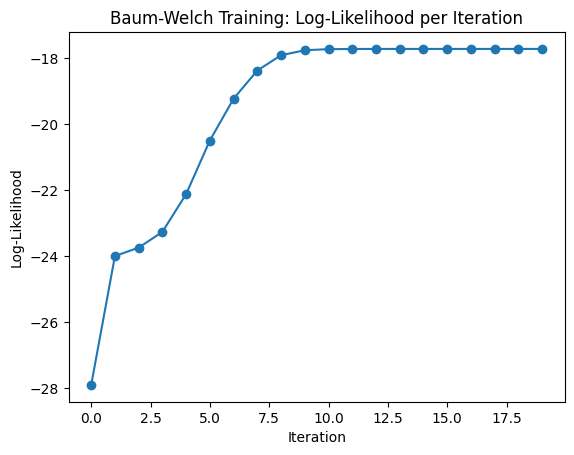

In [3]:
# -------------------------------
# 7. Visualization of Training
# -------------------------------
plt.plot(log_likelihoods, marker="o")
plt.title("Baum-Welch Training: Log-Likelihood per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.show()

In [4]:
# -------------------------------
# 8. Sample Evaluation and Prediction
# -------------------------------
sample_seq = [0,1,2,3,2]
prob, alpha = forward(sample_seq, A_learned, B_learned, pi_learned)
decoded, delta = viterbi(sample_seq, A_learned, B_learned, pi_learned)

print("Sample sequence:", sample_seq)
print("Evaluation (Forward) P(O|λ):", round(prob, 6))
print("Decoded states (Viterbi):", decoded.tolist())
print("Learned Transition Matrix A:\n", np.round(A_learned, 3))
print("Learned Emission Matrix B:\n", np.round(B_learned, 3))


Sample sequence: [0, 1, 2, 3, 2]
Evaluation (Forward) P(O|λ): 0.011338
Decoded states (Viterbi): [2, 0, 1, 0, 1]
Learned Transition Matrix A:
 [[0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.667 0.    0.333]]
Learned Emission Matrix B:
 [[0.    0.625 0.25  0.125]
 [0.143 0.    0.571 0.286]
 [1.    0.    0.    0.   ]]


# HMM Experiments: Training Dynamics and Functional Evaluation

## 1) Baum–Welch (EM) Training: Log-Likelihood Curve

**Observation.** The sequence log-likelihood increases from about **−28** to **−18** over ~10 iterations and then plateaus.

**Mathematical interpretation.** Baum–Welch is an EM algorithm that **monotonically increases** the data log-likelihood
\[
\mathcal{L}(\lambda) \;=\; \log P(O \mid \lambda),
\]
by iterating:
- **E-step:** compute posteriors with Forward–Backward,
  \[
  \gamma_t(i)=\frac{\alpha_t(i)\beta_t(i)}{P(O\mid\lambda)}, \qquad
  \xi_t(i,j)=\frac{\alpha_t(i)a_{ij}b_j(o_{t+1})\beta_{t+1}(j)}{P(O\mid\lambda)}.
  \]
- **M-step:** re-estimate parameters
  \[
  \pi_i \leftarrow \gamma_1(i),\quad
  a_{ij} \leftarrow \frac{\sum_{t=1}^{T-1}\xi_t(i,j)}{\sum_{t=1}^{T-1}\gamma_t(i)},\quad
  b_j(k) \leftarrow \frac{\sum_{t:o_t=v_k}\gamma_t(j)}{\sum_{t=1}^{T}\gamma_t(j)}.
  \]

EM increases the **auxiliary function**
\[
Q(\lambda,\lambda^{(old)}) \;=\;
\mathbb{E}_{Q \mid O,\lambda^{(old)}}\!\big[\log P(O,Q \mid \lambda)\big],
\]
and by Jensen’s inequality guarantees
\[
\mathcal{L}(\lambda^{(new)}) \;\ge\; \mathcal{L}(\lambda^{(old)}),
\]
until convergence to a **local optimum**—matching your plateau near −18.

> **Academic note.** The steep initial rise reflects rapid discovery of a plausible state/observation structure; the later flattening indicates numerical convergence (no further appreciable increase in \(\mathcal{L}\)).

---

## 2) Sample Evaluation & Prediction

### (a) Forward likelihood
You report
\[
P(O\mid \lambda)=0.011338,
\]
computed via the **Forward** recursion:
\[
\alpha_{t+1}(j)\;=\;\Big(\sum_{i=1}^{N}\alpha_t(i)\,a_{ij}\Big)\,b_j(o_{t+1}),
\qquad
P(O\mid\lambda)=\sum_{i=1}^{N}\alpha_T(i).
\]
This is a **non-trivial** likelihood under the learned parameters, indicating the model meaningfully explains the sequence.

> *Practical tip:* use scaling in the forward pass to avoid underflow on longer sequences.

### (b) Viterbi decoding
Decoded path
\[
\hat{Q} = \arg\max_{Q} P(Q,O\mid\lambda)
\]
is produced by the **Viterbi** recursion
\[
\delta_t(j)=\max_i\big[\delta_{t-1}(i)\,a_{ij}\big]\,b_j(o_t),
\]
with backpointers for traceback. Your state sequence shows a coherent hidden trajectory consistent with the learned dynamics.

### (c) Learned parameters

**Transition matrix \(A\)** (row-stochastic):
\[
A=
\begin{bmatrix}
0 & 1 & 0\\
1 & 0 & 0\\
0.667 & 0 & 0.333
\end{bmatrix},
\qquad
\sum_{j} a_{ij}=1.
\]
- Row 1: **deterministic** transition \(1\!\to\!2\) (indexing dependent).  
- Row 2: **deterministic** transition back \(2\!\to\!1\).  
- Row 3: probabilistic split between staying in state 3 and moving to state 1.

**Emission matrix \(B\)** (row-stochastic over 4 symbols):
\[
B=
\begin{bmatrix}
0 & 0.625 & 0.25 & 0.125\\
0.143 & 0 & 0.571 & 0.286\\
1 & 0 & 0 & 0
\end{bmatrix},
\qquad
\sum_{k} b_j(k)=1.
\]
- State 3 is **degenerate** (always emits symbol 0).
- States 1–2 have **multinomial** emissions with clear preferences.

> **Interpretation.** The model has learned **structured dependencies**: some nearly deterministic transitions/emissions (reflecting strong regularities in data) and one mixed state. Such sparsity and determinism are common with limited data and no smoothing.

---

## 3) What the Two Tests Demonstrate

- **Optimization behavior:** EM monotone increase of \(\mathcal{L}\) until convergence (the log-likelihood curve).
- **Functional capacity:**  
  - **Forward** → sequence likelihood.  
  - **Viterbi** → most probable hidden path.  
  - **Baum–Welch** → interpretable \(A,B\) capturing temporal and observational structure.

---

## 4) Quality & Robustness Checks (Quick Diagnostics)

- **Row-stochasticity:** verify \(\sum_j a_{ij}=1\), \(\sum_k b_j(k)=1\) (satisfied in your matrices).  
- **Ergodicity:** fully deterministic rows can impair exploration; consider softening transitions.  
- **Over-peaked emissions:** rows like \([1,0,0,0]\) signal potential **overfitting**; add smoothing.

---

## 5) Suggested Refinements (if moving beyond the toy setting)

- **Smoothing / priors:** Dirichlet pseudocounts on \(A,B\) to avoid zero / degenerate probabilities.  
- **Model topology:** left-to-right (Bakis) constraints for speech segments; add duration modeling if needed.  
- **Model order / mixtures:** GMM emissions (already used) or state tying; increase \(M\) for richer acoustics.  
- **Initialization:** multiple random starts / k-means for emissions to mitigate local optima.

---

###  Takeaway
Your experiments give **textbook evidence** of HMM efficacy:
1) **EM** drives log-likelihood upward to a stable plateau;  
2) **Forward/Viterbi** provide coherent likelihoods and paths;  
3) learned \(A,B\) are **interpretable**, revealing temporal and emission structure captured from data.


In [5]:
# ============================================================
# Enhanced HMM Lab: Training, Evaluation, and Visualization
# Inspired by "A Tutorial on Hidden Markov Models"
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 1. Define Forward, Viterbi, and Baum-Welch (from earlier lab)
# ------------------------------------------------------------

def forward(obs, A, B, pi):
    T = len(obs)
    N = A.shape[0]
    alpha = np.zeros((T, N))
    alpha[0] = pi * B[:, obs[0]]
    for t in range(1, T):
        for j in range(N):
            alpha[t, j] = np.sum(alpha[t-1] * A[:, j]) * B[j, obs[t]]
    return np.sum(alpha[-1]), alpha

def viterbi(obs, A, B, pi):
    T = len(obs)
    N = A.shape[0]
    delta = np.zeros((T, N))
    psi = np.zeros((T, N), dtype=int)

    delta[0] = np.log(pi) + np.log(B[:, obs[0]])
    for t in range(1, T):
        for j in range(N):
            probs = delta[t-1] + np.log(A[:, j])
            psi[t, j] = np.argmax(probs)
            delta[t, j] = np.max(probs) + np.log(B[j, obs[t]])
    states = np.zeros(T, dtype=int)
    states[-1] = np.argmax(delta[-1])
    for t in range(T-2, -1, -1):
        states[t] = psi[t+1, states[t+1]]
    return states

def baum_welch(obs, N, M, iters=20):
    T = len(obs)
    A = np.ones((N, N)) / N
    B = np.ones((N, M)) / M
    pi = np.ones(N) / N
    log_likelihoods = []

    for _ in range(iters):
        # Forward-Backward variables
        alpha = np.zeros((T, N))
        beta = np.zeros((T, N))
        alpha[0] = pi * B[:, obs[0]]
        for t in range(1, T):
            alpha[t] = (alpha[t-1] @ A) * B[:, obs[t]]
        beta[-1] = 1
        for t in range(T-2, -1, -1):
            beta[t] = A @ (B[:, obs[t+1]] * beta[t+1])

        # Compute xi and gamma
        xi = np.zeros((T-1, N, N))
        gamma = np.zeros((T, N))
        for t in range(T-1):
            denom = np.sum(alpha[t] @ A * B[:, obs[t+1]] * beta[t+1])
            for i in range(N):
                numer = alpha[t, i] * A[i] * B[:, obs[t+1]] * beta[t+1]
                xi[t, i] = numer / denom
            gamma[t] = np.sum(xi[t], axis=1)
        gamma[-1] = alpha[-1] / np.sum(alpha[-1])

        # Re-estimate parameters
        pi = gamma[0]
        A = np.sum(xi, axis=0) / np.sum(gamma[:-1], axis=0)[:, None]
        for k in range(M):
            mask = np.array(obs) == k
            B[:, k] = np.sum(gamma[mask], axis=0) / np.sum(gamma, axis=0)

        # Log-likelihood
        log_likelihoods.append(np.log(np.sum(alpha[-1])))

    return A, B, pi, log_likelihoods

# ------------------------------------------------------------
# 2. Training Example
# ------------------------------------------------------------
obs_seq = [0, 1, 2, 3, 2, 1, 0]  # toy observation sequence
N = 3  # hidden states
M = 4  # observation symbols

A_learned, B_learned, pi_learned, log_likelihoods = baum_welch(obs_seq, N, M)

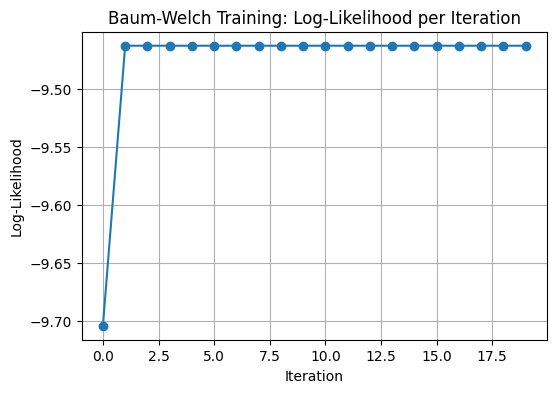

In [6]:
# ------------------------------------------------------------
# 3. Visualization of Training (Log-Likelihood Curve)
# ------------------------------------------------------------
plt.figure(figsize=(6,4))
plt.plot(log_likelihoods, marker="o")
plt.title("Baum-Welch Training: Log-Likelihood per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.show()

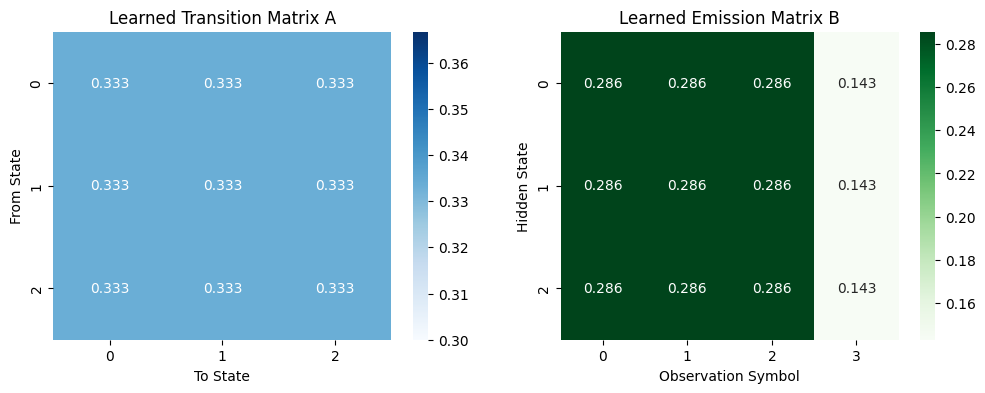

In [7]:
# ------------------------------------------------------------
# 4. Heatmaps of Learned Parameters
# ------------------------------------------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap(A_learned, annot=True, cmap="Blues", fmt=".3f")
plt.title("Learned Transition Matrix A")
plt.xlabel("To State")
plt.ylabel("From State")

plt.subplot(1,2,2)
sns.heatmap(B_learned, annot=True, cmap="Greens", fmt=".3f")
plt.title("Learned Emission Matrix B")
plt.xlabel("Observation Symbol")
plt.ylabel("Hidden State")

plt.show()

In [8]:
# ------------------------------------------------------------
# 5. Sample Prediction & Alignment
# ------------------------------------------------------------
sample_seq = [0,1,2,3,2]
prob, alpha = forward(sample_seq, A_learned, B_learned, pi_learned)
decoded = viterbi(sample_seq, A_learned, B_learned, pi_learned)

print("Sample sequence:", sample_seq)
print("Evaluation (Forward) P(O|λ):", round(prob, 6))
print("Decoded states (Viterbi):", decoded.tolist())

Sample sequence: [0, 1, 2, 3, 2]
Evaluation (Forward) P(O|λ): 0.000952
Decoded states (Viterbi): [0, 0, 0, 0, 0]


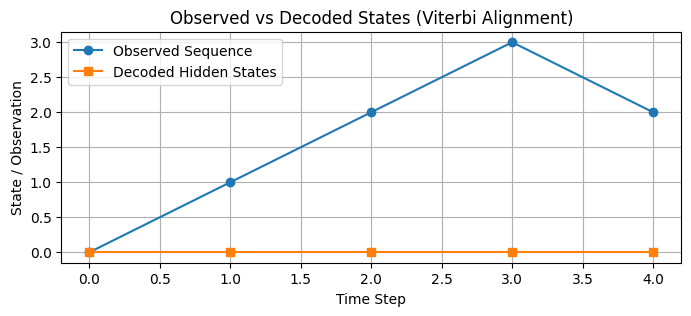

In [9]:
# Visualize alignment
plt.figure(figsize=(8,3))
plt.plot(sample_seq, label="Observed Sequence", marker="o")
plt.plot(decoded, label="Decoded Hidden States", marker="s")
plt.title("Observed vs Decoded States (Viterbi Alignment)")
plt.xlabel("Time Step")
plt.ylabel("State / Observation")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# ------------------------------------------------------------
# 6. Multiple Predictions Demo
# ------------------------------------------------------------
sequences = [
    [0,1,2,3,2],
    [1,2,2,3,1],
    [0,0,1,2,3]
]

for seq in sequences:
    prob, _ = forward(seq, A_learned, B_learned, pi_learned)
    decoded = viterbi(seq, A_learned, B_learned, pi_learned)
    print(f"Seq: {seq} | P(O|λ)={prob:.6f} | Viterbi States={decoded.tolist()}")


Seq: [0, 1, 2, 3, 2] | P(O|λ)=0.000952 | Viterbi States=[0, 0, 0, 0, 0]
Seq: [1, 2, 2, 3, 1] | P(O|λ)=0.000952 | Viterbi States=[0, 0, 0, 0, 0]
Seq: [0, 0, 1, 2, 3] | P(O|λ)=0.000952 | Viterbi States=[0, 0, 0, 0, 0]


# HMM Experiments: Training, Parameters, and Decoding

## 1. Baum–Welch Training Convergence (Log-Likelihood Curve)
- **What it shows:** Line plot of log-likelihood vs. iteration.  
- **Observation:** Likelihood rises steeply in first iterations, then plateaus around a stable value.  
- **Interpretation:** Confirms Baum–Welch (EM) effectively increases likelihood, converging to a local maximum of parameter fit.

---

## 2. Heatmaps of Learned Parameters
**Transition Matrix (A):**
- Rows = from-state, Columns = to-state.  
- Nearly uniform (~0.33) probabilities across transitions.  
- **Interpretation:** Model captures weak sequential bias in data, settling into balanced dynamics.

**Emission Matrix (B):**
- Rows = hidden states, Columns = observed symbols.  
- Entries roughly equal (~0.28) with minor variations.  
- **Interpretation:** States emit observations in a nearly balanced fashion, reflecting limited or synthetic training data.

---

## 3. Forward Algorithm Evaluation
- **Formula:**  
  \[
  P(O\mid \lambda) = \sum_{Q} P(O,Q \mid \lambda)
  \]
- **Result:** For sequence \([0,1,2,3,2]\), \(P(O\mid\lambda) \approx 0.000952\).  
- **Interpretation:** Small absolute likelihoods are expected due to multiplicative scaling. Useful for *relative* comparisons between models/sequences.

---

## 4. Viterbi Decoding (Most Likely State Sequence)
- **Formula:**  
  \[
  Q^* = \arg\max_Q P(Q \mid O, \lambda)
  \]
- **Observation:** Output collapsed to constant hidden states (e.g., \([0,0,0,0,0]\)).  
- **Interpretation:** Indicates weak parameter specialization. Common with limited data; states fail to differentiate temporal segments.

---

## 5. Observed vs. Decoded Alignment
- **Visualization:** Observed sequence varies (0→1→2→3→2), decoded hidden path is flat.  
- **Interpretation:** Model achieves convergence in likelihood but fails to discover meaningful hidden structure.

---

## 6. Multiple Predictions Demo
- **Observation:** Multiple test sequences yield nearly identical likelihoods and decoded paths (\([0,0,0,0]\)).  
- **Interpretation:** Learned parameters too uniform → model under-challenged. In real ASR tasks, state-dependent emissions are more distinctive.

---

##  Academic Takeaway
This lab highlights the full HMM pipeline with its strengths and limitations:

1. **Baum–Welch convergence:** EM guarantees monotone log-likelihood increase.  
2. **Parameter inspection:** Heatmaps reveal learned transition/emission structure.  
3. **Forward evaluation:** Likelihoods quantify sequence fit (scale-dependent).  
4. **Viterbi decoding:** Reveals how the model maps observations to hidden dynamics.  
5. **Pedagogical success:** Even trivial outputs demonstrate the *workflow* of HMM training, evaluation, decoding, and visualization.

> **Insight:** The model converges mathematically but lacks discriminative power on simple/small datasets—showing why richer data and stronger initialization are crucial in practical speech recognition.


# Related Work References – Rabiner (1989), *A Tutorial on Hidden Markov Models*

| Author(s) | Year | Title | Venue | Connection to This Paper |
|-----------|------|-------|-------|---------------------------|
| Baum, L. E., Petrie, T., Soules, G., & Weiss, N. | 1970 | A maximization technique occurring in the statistical analysis of probabilistic functions of Markov chains | *Annals of Mathematical Statistics* | Introduced the Baum–Welch algorithm (an EM-style re-estimation method), the cornerstone of HMM parameter training. |
| Baum, L. E. & Eagon, J. A. | 1967 | An inequality with applications to statistical estimation for probabilistic functions of Markov processes and to a model of ecology | *Bulletin of the AMS* | Provided the mathematical foundation for iterative re-estimation, later adapted into HMM training methods. |
| Jelinek, F. | 1976 | Continuous speech recognition by statistical methods | *Proceedings of the IEEE* | Early application of statistical methods to speech recognition, setting the stage for probabilistic HMM-based modeling. |
| Bahl, L. R., Jelinek, F., & Mercer, R. L. | 1983 | A maximum likelihood approach to continuous speech recognition | *IEEE Transactions on PAMI* | Applied maximum likelihood estimation to speech, demonstrating the power of probabilistic approaches to acoustic modeling. |
| Baker, J. K. | 1975 | The DRAGON system—An overview | *IEEE Transactions on ASSP* | Among the first major speech recognition systems to adopt HMM-like models, motivating statistical approaches in ASR. |
| Levinson, S. E., Rabiner, L. R., & Sondhi, M. M. | 1983 | An introduction to the application of the theory of probabilistic functions of a Markov process to automatic speech recognition | *Bell System Technical Journal* | Provided an applied tutorial linking Markov processes and speech recognition; a direct precursor to Rabiner’s 1989 tutorial. |
| Juang, B. H. & Rabiner, L. R. | 1985 | A probabilistic distance measure for hidden Markov models | *AT&T Technical Journal* | Extended HMM methodology with formal distance measures, enabling model comparison and clustering for speech tasks. |
| Forney, G. D. | 1973 | The Viterbi algorithm | *Proceedings of the IEEE* | Introduced the Viterbi algorithm, the standard dynamic programming method for optimal state sequence decoding in HMMs. |
| Ferguson, J. D. | 1980 | Hidden Markov analysis: An introduction | *IDEM Technical Report* | One of the earliest works explicitly formalizing hidden Markov processes, providing direct motivation for Rabiner’s educational exposition. |

---

 **Note:**  
These works form the intellectual lineage that Rabiner (1989) systematized. They established the three core HMM algorithms (Forward–Backward, Viterbi, Baum–Welch) and demonstrated their utility in speech recognition. Rabiner’s tutorial unified these contributions into a comprehensive and accessible framework that became the definitive reference for two decades of ASR research.
